<a href="https://colab.research.google.com/github/smriti09/GradientInv/blob/main/660_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)


In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
    import torchvision.transforms as transforms
    
    cc = torch.cat([training_data[i][0].reshape(-1) for i in range(len(training_data))], dim=0)
    data_mean = torch.as_tensor(torch.mean(cc, dim=0).item(),)
    data_std = torch.as_tensor(torch.std(cc, dim=0).item(),)
    normalize=True
    augmentations=True
    # Organize preprocessing
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize(data_mean, data_std) if normalize else transforms.Lambda(lambda x: x)])
    if augmentations:
        transform_train = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.RandomCrop(28, padding=4),
            transforms.RandomHorizontalFlip(),
            transform])
        training_data.transform = transform_train
    else:
        training_data.transform = transform
    test_data.transform = transform

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
class FNet(nn.Module):
    def __init__(self):
        super(FNet,self).__init__()
        self.fc1=nn.Linear(784,512)
        self.fc2=nn.Linear(512,256)
        self.out=nn.Linear(256,10)
        
        # Dropout probability - set for avoiding overfitting
        self.dropout=nn.Dropout(0.2)

    def forward(self,x):
        x = x.view(-1, 28 * 28)        
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.out(x)
        return x

In [ ]:
class convNet(nn.Module):
  def __init__(self):
    super(convNet,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,padding=1,stride=1)
    self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1,stride=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)


    self.fc1=nn.Linear(7*7*32,512)
    self.fc2=nn.Linear(512,256)
    self.out=nn.Linear(256,10)
    self.dropout=nn.Dropout(0.2)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,7*7*32)
    x = self.dropout(x)
    x=self.dropout(F.relu(self.fc1(x)))
    x=self.dropout(F.relu(self.fc2(x)))
    x=self.out(x)
    return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
model_1 = FNet().to(device)
print(model)

convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
model = convNet().to(device)
print(model)

convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

torch.Size([1])
['Coat']


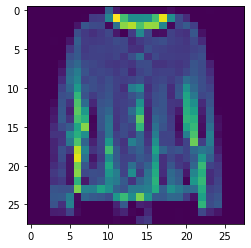

In [ ]:
idx = 25
import matplotlib.pyplot as plt

img, label = test_dataloader.dataset[idx]
labels = torch.as_tensor((label,), device=device)
ground_truth = torch.as_tensor(img.to(device)).sub(data_mean).div(data_std)
print(labels.shape)
plt.imshow(ground_truth[0]);
print([train_dataloader.dataset.classes[l] for l in labels]);

In [ ]:
import torchvision
arch='nn'
ground_truth_denormalized = torch.clamp(ground_truth[0] * data_std + data_mean, 0, 1)
torchvision.utils.save_image(ground_truth_denormalized, f'{idx}_{arch}_ImageNet_input.png')

In [ ]:
model.zero_grad()
loss_fn=torch.nn.CrossEntropyLoss(weight=None, size_average=None,ignore_index=-100,reduce=None,reduction='mean')
target_loss=loss_fn(model(ground_truth), labels)
input_gradient = torch.autograd.grad(target_loss, model.parameters())
input_gradient = [grad.detach() for grad in input_gradient]
full_norm = torch.stack([g.norm() for g in input_gradient]).mean()
print(f'Full gradient norm is {full_norm:e}.')

Full gradient norm is 4.323670e+00.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/Federated_learning/invertinggradients

/content/drive/My Drive/Federated_learning/invertinggradients


In [ ]:
model_1.zero_grad()
loss_fn=torch.nn.CrossEntropyLoss(weight=None, size_average=None,ignore_index=-100,reduce=None,reduction='mean')
target_loss=loss_fn(model_1(ground_truth), labels)
input_gradient = torch.autograd.grad(target_loss, model_1.parameters())
input_gradient = [grad.detach() for grad in input_gradient]
full_norm = torch.stack([g.norm() for g in input_gradient]).mean()
print(f'Full gradient norm is {full_norm:e}.')

Full gradient norm is 2.407590e+01.


It: 0. Rec. loss: 1.0085.
It: 500. Rec. loss: 0.1215.
It: 1000. Rec. loss: 0.1170.
It: 1500. Rec. loss: 0.1151.
It: 2000. Rec. loss: 0.1148.
It: 2399. Rec. loss: 0.1150.
Choosing optimal result ...
Optimal result score: 0.0853
Total time: 37.54792499542236.


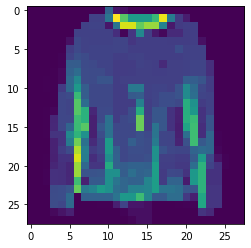

In [ ]:
import inversefed
config = dict(signed=True,
              boxed=True,
              cost_fn='sim',
              indices='def',
              weights='equal',
              lr=0.1,
              optim='sgd',
              restarts=1,
              max_iterations=24_00,
              total_variation=1e-1,
              init='randn',
              filter='none',
              lr_decay=True,
              scoring_choice='loss')

rec_machine = inversefed.GradientReconstructor(model, (data_mean, data_std), config, num_images=1)
output, stats = rec_machine.reconstruct(input_gradient, labels, img_shape=(1, 28, 28))

test_mse = (output.detach() - ground_truth).pow(2).mean()
feat_mse = (model(output.detach())- model(ground_truth)).pow(2).mean()  
#test_psnr = inversefed.metrics.psnr(output, ground_trut
plt.imshow(output[0][0])

In [ ]:
def total_variation(x):
    dx = torch.mean(torch.abs(x[:, :, :, :-1] - x[:, :, :, 1:]))
    dy = torch.mean(torch.abs(x[:, :, :-1, :] - x[:, :, 1:, :]))
    return dx + dy

In [ ]:
import time

DEFAULT_CONFIG = dict(wt='equal',
                      lr=0.1,
                      optimizer='adam',
                      lr_decay=True,
                      signal=False,
                      cost_fn='cosine_sim',
                      indices='def',
                      restarts=1,
                      iter=4800,
                      total_variation=1e-1,
                      init='randn',
                      filter='none',
                      boxed=True,
                      scoring_choice='loss')
class recovering_info():
    """Implementing the algorithm to recover data."""

    def __init__(self, model, mean_std=(0.0, 1.0), config=DEFAULT_CONFIG, data_points=1):
        self.data_points = data_points
        self.config = config
        self.model = model
        self.setup = dict(device=next(model.parameters()).device, dtype=next(model.parameters()).dtype)
        self.mean_std = mean_std
        self.loss_fn = torch.nn.CrossEntropyLoss()
    
    def data_initialization(self, data_shape):
        """for initializing the possible recovered image"""
        if self.config['init'] == 'randn':
            return torch.randn((self.data_points, *data_shape), **self.setup)
        elif self.config['init'] == 'rand':
            return (torch.rand((self.data_points, *data_shape), **self.setup) - 0.5) * 2
        elif self.config['init'] == 'zeros':
            return torch.zeros((self.data_points, *data_shape), **self.setup)
        else:
            raise ValueError()
    
    def reconstruct(self, data_shape, input_data, labels, eval=True):
        """Reconstruct from gradient."""
        start_time = time.time()
        if eval:
            self.model.eval()

        cost_val = torch.zeros(1)
        x = self.data_initialization(data_shape)
        
        assert labels.shape[0] == self.data_points

        try:
            x_attempt = self.trial(x, input_data, labels)
            if self.config['scoring_choice'] == 'loss':
              self.model.zero_grad()
              x_attempt.grad = None
              loss = self.loss_fn(self.model(x_attempt), labels)
              print("after loss")
              gradient = torch.autograd.grad(loss, self.model.parameters(), create_graph=False)
              cost_val = self.proposed_cost([gradient], input_gradient, cost_fn=self.config['cost_fn'], indices=self.config['indices'], weights=self.config['wt']) + self.config['total_variation']*total_variation(x_attempt)
            x = x_attempt
        except:
            print('Error occured.')
            pass

        score = torch.isfinite(cost_val) 
        print(f'result score: {score}')
        print(f'Total time: {time.time()-start_time}.')
        return x.detach()
    def proposed_cost(self, gradients, input_gradient, cost_fn='biultin_cosine_sim', indices='def', weights='equal'):

        if indices == 'def':
            indices = torch.arange(len(input_gradient))
        elif indices == 'batch':
            indices = torch.randperm(len(input_gradient))[:16]
        else:
            raise ValueError()

        
        if weights == 'linear':
            weights = torch.arange(len(input_gradient), 0, -1, dtype=input_gradient[0].dtype, device=input_gradient[0].device) / len(input_gradient)
        elif weights == 'exp':
            weights = torch.arange(len(input_gradient), 0, -1, dtype=input_gradient[0].dtype, device=input_gradient[0].device)
            weights = weights.softmax(dim=0)
            weights = weights / weights[0]
        else:
            weights = input_gradient[0].new_ones(len(input_gradient))

        total_costs = 0
        for gradient in gradients:
            pnorm = [0, 0]
            costs = 0
            for i in indices:

                if cost_fn == 'cosine_sim':
                    costs += (gradient[i] * input_gradient[i]).sum()
                    pnorm[0] += gradient[i].pow(2).sum() 
                    pnorm[1] += input_gradient[i].pow(2).sum()
                elif cost_fn == 'builtin_cosine_sim':
                    costs += 1 - torch.nn.functional.cosine_similarity(gradient[i].flatten(), input_gradient[i].flatten(),
                                                                      0, 1e-10) 
            if cost_fn == 'cosine_sim':
                costs = 1 - costs / pnorm[0].sqrt() / pnorm[1].sqrt()

        return costs / len(gradients)

    
    def trial(self, x_attempt, input_data, labels):
        x_attempt.requires_grad = True
        if self.config['optimizer'] == 'adam':
            optimizer = torch.optim.Adam([x_attempt], lr=self.config['lr'])
        elif self.config['optimizer'] == 'sgd':  
            optimizer = torch.optim.SGD([x_attempt], lr=0.01, momentum=0.9, nesterov=True)
        else:
            raise ValueError()
        iters = self.config['iter']
        dm, ds = self.mean_std

        if self.config['lr_decay']:
            scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[iters // 2.667, iters // 1.6,iters // 1.142], gamma=0.1)   # 3/8 5/8 7/8

        try:
            for iteration in range(iters):
                closure = self.step_closure(optimizer, x_attempt, input_data, labels)
                reconstruction_loss = optimizer.step(closure)
                if self.config['lr_decay']:
                    scheduler.step()
                with torch.no_grad():
                    
                    if self.config['boxed']:
                        x_attempt.data = torch.max(torch.min(x_attempt, (1 - dm) / ds), -dm / ds)
                    if (iteration + 1 == iters) or iteration % 100 == 0:
                        print(f'It: {iteration}. Rec. loss: {reconstruction_loss.item():2.4f}.')
                    if (iteration + 1) % 100 == 0:
                        if self.config['filter'] == 'none':
                            pass
                        elif self.config['filter'] == 'avg':
                            x_attempt.data = torch.nn.AvgPool2d(kernel_size=3, stride=1, padding=1, same=False)(x_attempt)
                        else:
                            raise ValueError()
        except:
          print("error ")
          pass
        return x_attempt.detach()

    def step_closure(self, optimizer, x_attempt, input_gradient, label):
        ##optimizer step needs closure to be callable
        def closure():
            optimizer.zero_grad()
            self.model.zero_grad()
            loss= self.loss_fn(self.model(x_attempt), label)
            gradient_attempt = torch.autograd.grad(loss, self.model.parameters(), create_graph=True)
            
            reconstruction_loss = self.proposed_cost([gradient_attempt], input_gradient, cost_fn=self.config['cost_fn'], indices=self.config['indices'], weights=self.config['wt'])
            if self.config['total_variation'] > 0:
                reconstruction_loss += self.config['total_variation'] * total_variation(x_attempt)
            reconstruction_loss.backward()
            if self.config['signal']:
                x_attempt.grad.sign_()
            return reconstruction_loss
        return closure



It: 0. Rec. loss: 1.0087.
It: 100. Rec. loss: 0.1200.
It: 200. Rec. loss: 0.1155.
It: 239. Rec. loss: 0.1155.
after loss
result score: True
Total time: 3.7291738986968994.


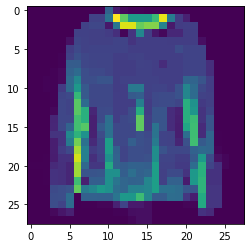

In [ ]:
config = dict(signal=True,
              cost_fn='cosine_sim',
              indices='def',
              wt='equal',
              lr=0.1,
              optimizer='adam',
              iter=24_0,
              total_variation=1e-1,
              init='randn',
              filter='none',
              lr_decay=True,
              boxed=True,
              scoring_choice='loss')

rec_machine = recovering_info(model, (data_mean, data_std), config, data_points=1)
output = rec_machine.reconstruct((1, 28, 28), input_gradient, labels)

test_mse = (output.detach() - ground_truth).pow(2).mean()
feat_mse = (model(output.detach())- model(ground_truth)).pow(2).mean()  


plt.imshow(output[0][0])

In [ ]:
!pwd

/content/drive/My Drive/Federated_learning/invertinggradients


Trying Power Samples

In [ ]:
import numpy as np

# Load the .npz file
new_tensor1=torch.empty(256, 1000, 1)

with np.load('/content/drive/MyDrive/Federated_learning/invertinggradients/data/Power_file1.npz') as data:
  # Access the arrays stored in the file
  print(data['traces'].shape)
  indices=[x for x in range(40000,41000)]
  arr=np.take(data['traces'], indices, axis=1)
  indices=[x for x in range(0,5)]
  arr=np.take(arr, indices, axis=0)
  print(arr.shape)
  new_tensor1=torch.tensor(arr)
  print(new_tensor1.shape)


(256, 80000, 1)
(5, 1000, 1)
torch.Size([5, 1000, 1])


In [ ]:
output_val1=torch.empty(16,256)
with np.load('/content/drive/MyDrive/Federated_learning/invertinggradients/data/Power_file1.npz') as data:
  # Print the names and values of all arrays in the file
  array = data['keys']
  indices=[x for x in range(0,5)]
  array=np.take(array[0], indices, axis=0)
  output_val1=torch.tensor(array)



(5, 1000, 1)


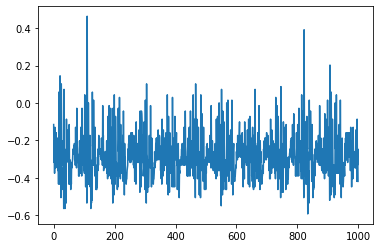

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
to_pil = transforms.ToPILImage()
with np.load('/content/drive/MyDrive/Federated_learning/invertinggradients/data/Power_file1.npz') as data:
  # Print the names and values of all arrays in the file
  
  
  indices=[x for x in range(40000,41000)]
  arr=np.take(data['traces'], indices, axis=1)
  indices=[x for x in range(0,5)]
  arr=np.take(arr, indices, axis=0)
  print(arr.shape)
  plt.plot(arr[0])
  plt.show()


In [ ]:
output_val2=torch.empty(16,256)
with np.load('/content/drive/MyDrive/Federated_learning/invertinggradients/data/Power_file2.npz') as data:
  # Print the names and values of all arrays in the file
  
  array = data['keys']

  indices=[x for x in range(0,5)]
  array=np.take(array[0], indices, axis=0)
  output_val2=torch.tensor(array)
  

In [ ]:
print(output_val2.shape)

torch.Size([5])


(80000, 1)


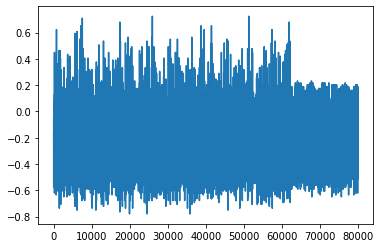

In [ ]:
import matplotlib.pyplot as plt
with np.load('/content/drive/MyDrive/Federated_learning/invertinggradients/data/Power_file2.npz') as data:
  # Print the names and values of all arrays in the file
  
  array = data['traces']
  print(array[0].shape)
  plt.plot(array[0])
  plt.show()

In [ ]:
import numpy as np

# Load the .npz file
new_tensor2=torch.empty(256, 1000, 1)

with np.load('/content/drive/MyDrive/Federated_learning/invertinggradients/data/Power_file2.npz') as data:
  # Access the arrays stored in the file
  print(data['traces'].shape)
  indices=[x for x in range(40000,41000)]
  arr=np.take(data['traces'], indices, axis=1)
  indices=[x for x in range(0,5)]
  arr=np.take(arr, indices, axis=0)
  print(arr.shape)
  new_tensor2=torch.tensor(arr)
  print(new_tensor2.shape)

(256, 80000, 1)
(5, 1000, 1)
torch.Size([5, 1000, 1])


In [ ]:
combined_x = torch.cat([new_tensor1, new_tensor2], dim=0)

In [ ]:
print(combined_x.shape)

torch.Size([10, 1000, 1])


In [ ]:

combined_y= torch.cat([output_val1,output_val2],dim=0)
print(combined_y.shape)

torch.Size([10])


In [ ]:
#untrained model
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1000, 100, 1, stride=10)
        self.pool = nn.MaxPool1d(10, 1)
        self.conv2 = nn.Conv1d(481, 472, 10)
        self.fc1 = nn.Linear(472, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1000*1, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model_1 = NeuralNetwork().to(device)
print(model_1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
  )
)


In [ ]:
combined_x=combined_x.to(torch.float32)
ground_truth = combined_x.to(device)
print(ground_truth[0].shape)
model_1.zero_grad()
labels_1 = combined_y.to(device)
loss_fn=torch.nn.CrossEntropyLoss(reduce=None,reduction='mean')
target_loss=loss_fn(model_1(ground_truth), labels_1)
input_gradient = torch.autograd.grad(target_loss, model_1.parameters())
input_gradient = [grad.detach() for grad in input_gradient]
full_norm = torch.stack([g.norm() for g in input_gradient]).mean()
print(f'Full gradient norm is {full_norm:e}.')

torch.Size([1000, 1])
Full gradient norm is 4.937598e-01.


In [ ]:
import inversefed
config = dict(signed=True,
              boxed=True,
              cost_fn='sim',
              indices='def',
              weights='equal',
              lr=0.1,
              optim='adam',
              restarts=8,
              max_iterations=24_0,
              total_variation=1e-1,
              init='randn',
              filter='none',
              lr_decay=True,
              scoring_choice='loss')
data_mean=torch.as_tensor(0.12,)
data_std=torch.as_tensor(0.3,)
rec_machine = inversefed.GradientReconstructor(model_1, (data_mean, data_std), config, num_images=1)
output, stats = rec_machine.reconstruct(input_gradient, labels, img_shape=(1, 1000, 1))


test_mse = (output.detach() - ground_truth).pow(2).mean()

plt.imshow(output[0][0])

In [ ]:
print(output.shape)

torch.Size([1, 1, 1000, 1])


In [ ]:
np_arr = output.cpu().detach().numpy()

(1, 1000, 1)


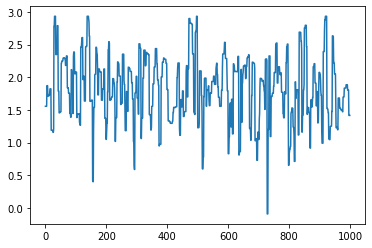

In [ ]:
print(np_arr[0].shape)
plt.plot(np_arr[0][0])
plt.show()

In [ ]:
import time

DEFAULT_CONFIG = dict(wt='equal',
                      lr=0.1,
                      optimizer='adam',
                      lr_decay=True,
                      signal=False,
                      cost_fn='cosine_sim',
                      indices='def',
                      restarts=1,
                      iter=4800,
                      total_variation=1e-1,
                      init='randn',
                      filter='none',
                      boxed=True,
                      scoring_choice='loss')
class recovering_info():
    """Implementing the algorithm to recover data."""

    def __init__(self, model, mean_std=(0.0, 1.0), config=DEFAULT_CONFIG, data_points=1):
        self.data_points = data_points
        self.config = config
        self.model = model
        self.setup = dict(device=next(model.parameters()).device, dtype=next(model.parameters()).dtype)
        self.mean_std = mean_std
        self.loss_fn = torch.nn.CrossEntropyLoss()
    
    def data_initialization(self, data_shape):
        """for initializing the possible recovered image"""
        if self.config['init'] == 'randn':
            return torch.randn((self.data_points, *data_shape), **self.setup)
        elif self.config['init'] == 'rand':
            return (torch.rand((self.data_points, *data_shape), **self.setup) - 0.5) * 2
        elif self.config['init'] == 'zeros':
            return torch.zeros((self.data_points, *data_shape), **self.setup)
        else:
            raise ValueError()
    
    def reconstruct(self, data_shape, input_data, labels, eval=True):
        """Reconstruct from gradient."""
        start_time = time.time()
        if eval:
            self.model.eval()

        cost_val = torch.zeros(1)
        x = self.data_initialization(data_shape)
        
        assert labels.shape[0] == self.data_points
        try:
            x_attempt = self.trial(x, input_data, labels)
            if self.config['scoring_choice'] == 'loss':
              self.model.zero_grad()
              x_attempt.grad = None
              loss = self.loss_fn(self.model(x_attempt), labels)
              gradient = torch.autograd.grad(loss, self.model.parameters(), create_graph=False)
              
              cost_val = self.proposed_cost([gradient], input_gradient, cost_fn=self.config['cost_fn'], indices=self.config['indices'], weights=self.config['wt']) + self.config['total_variation']*total_variation(x_attempt)
            x = x_attempt
        except:
            print('Error occured.')
            pass

        score = torch.isfinite(cost_val) # check NaN/-Inf 
        print(f'result score: {score}')
        print(f'Total time: {time.time()-start_time}.')
        return x.detach()
    def proposed_cost(self, gradients, input_gradient, cost_fn='builtin_cosine_sim', indices='def', weights='equal'):
        if indices == 'def':
            indices = torch.arange(len(input_gradient))
        elif indices == 'batch':
            indices = torch.randperm(len(input_gradient))[:16]
        else:
            raise ValueError()

        
        if weights == 'linear':
            weights = torch.arange(len(input_gradient), 0, -1, dtype=input_gradient[0].dtype, device=input_gradient[0].device) / len(input_gradient)
        elif weights == 'exp':
            weights = torch.arange(len(input_gradient), 0, -1, dtype=input_gradient[0].dtype, device=input_gradient[0].device)
            weights = weights.softmax(dim=0)
            weights = weights / weights[0]
        else:
            weights = input_gradient[0].new_ones(len(input_gradient))

        total_costs = 0
        for gradient in gradients:
            pnorm = [0, 0]
            costs = 0
            for i in indices:

                if cost_fn == 'cosine_sim':
                    costs += (gradient[i] * input_gradient[i]).sum()
                    pnorm[0] += gradient[i].pow(2).sum() 
                    pnorm[1] += input_gradient[i].pow(2).sum()
                elif cost_fn == 'builtin_cosine_sim':
                    costs += 1 - torch.nn.functional.cosine_similarity(gradient[i].flatten(), input_gradient[i].flatten(),
                                                                      0, 1e-10) 
            if cost_fn == 'cosine_sim':
                costs = 1 - costs / pnorm[0].sqrt() / pnorm[1].sqrt()

        return costs / len(gradients)

    
    def trial(self, x_attempt, input_data, labels):
        x_attempt.requires_grad = True
        if self.config['optimizer'] == 'adam':
            optimizer = torch.optim.Adam([x_attempt], lr=self.config['lr'])
        elif self.config['optimizer'] == 'sgd':  
            optimizer = torch.optim.SGD([x_attempt], lr=0.01, momentum=0.9, nesterov=True)
        else:
            raise ValueError()
        iters = self.config['iter']
        dm, ds = self.mean_std

        if self.config['lr_decay']:
            scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[iters // 2.667, iters // 1.6,iters // 1.142], gamma=0.1)   # 3/8 5/8 7/8

        try:
            for iteration in range(iters):
                closure = self._gradient_closure(optimizer, x_attempt, input_data, labels)
                reconstruction_loss = optimizer.step(closure)
                if self.config['lr_decay']:
                    scheduler.step()
                with torch.no_grad():
                    print("in with")
                    if self.config['boxed']:
                        x_attempt.data = torch.max(torch.min(x_attempt, (1 - dm) / ds), -dm / ds)
                    print()
                    if (iteration + 1 == iters) or iteration % 100 == 0:
                        print(f'It: {iteration}. Rec. loss: {reconstruction_loss.item():2.4f}.')
                    if (iteration + 1) % 100 == 0:
                        if self.config['filter'] == 'none':
                            pass
                        elif self.config['filter'] == 'avg':
                            x_attempt.data = torch.nn.AvgPool2d(kernel_size=3, stride=1, padding=1, same=False)(x_attempt)
                        else:
                            raise ValueError()
        except:
          print("error ")
          pass
        return x_attempt.detach()

    def _gradient_closure(self, optimizer, x_attempt, input_gradient, label):
        ##optimizer step needs closure to be callable
        def closure():
            optimizer.zero_grad()
            self.model.zero_grad()
            loss_attempt = self.loss_fn(self.model(x_attempt), label)
            gradient_attempt = torch.autograd.grad(loss_attempt, self.model.parameters(), create_graph=True)
            reconstruction_loss = self.proposed_cost([gradient_attempt], input_gradient, cost_fn=self.config['cost_fn'], indices=self.config['indices'], weights=self.config['wt'])
            if self.config['total_variation'] > 0:
                reconstruction_loss += self.config['total_variation'] * total_variation(x_attempt)
            reconstruction_loss.backward()

            if self.config['signal']:
                x_attempt.grad.sign_()
            
            return reconstruction_loss
        return closure


In [ ]:
config = dict(signal=True,
              cost_fn='cosine_sim',
              indices='def',
              wt='equal',
              lr=0.1,
              optimizer='adam',
              iter=24_0,
              total_variation=1e-1,
              init='randn',
              filter='none',
              lr_decay=True,
              boxed=True,
              scoring_choice='loss')
data_mean=torch.as_tensor(0.12,)
data_std=torch.as_tensor(0.3,)
rec_machine = recovering_info(model_1, (data_mean, data_std), config, data_points=1)
output = rec_machine.reconstruct((1, 1000, 1),input_gradient, labels)


test_mse = (output.detach() - ground_truth).pow(2).mean()


(1, 1000, 1)


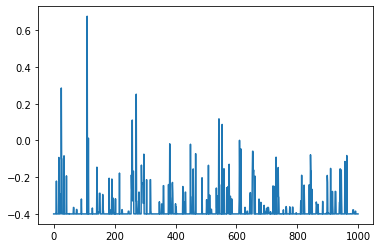

In [ ]:
np_arr = output.cpu().detach().numpy()
print(np_arr[0].shape)
plt.plot(np_arr[0][0])
plt.show()

In [ ]:
import torch 
from torchvision import transforms,datasets
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import SubsetRandomSampler
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
train_data=datasets.FashionMNIST('data',train=True,download=True,transform=transform)
test_data=datasets.FashionMNIST('data',train=False,download=True,transform=transform)


In [ ]:
valid_size=0.2
train_length=len(train_data)

indices=[i for i in range(train_length)]
np.random.shuffle(indices)

split=int(np.floor(valid_size*train_length))
train_idx=indices[split:]
valid_idx=indices[:split]


train_sampler=SubsetRandomSampler(train_idx)
valid_sampler=SubsetRandomSampler(valid_idx)

num_workers=0
batch_size=20
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=train_sampler,num_workers=num_workers)
valid_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=train_sampler,num_workers=num_workers)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

In [ ]:
dataiter=iter(train_loader)
images,labels=dataiter.next()
print(images, images.shape, len(images), images[0].shape)
print()
print(labels,labels.shape,len(labels))

In [ ]:
model_1=FNet()
model_2=convNet()
def weight_init_normal(m):
    classname=m.__class__.__name__
    if classname.find('Linear')!=-1:
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
model_1.apply(weight_init_normal),model_2.apply(weight_init_normal)
use_cuda=True
if use_cuda and torch.cuda.is_available():
  model_1.cuda()
  model_2.cuda()


print(model_1,'\n\n\n\n',model_2,'\n\n\n\n','On GPU : ',torch.cuda.is_available())


FNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



 convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



 On GPU :  False


In [ ]:
criterion=nn.CrossEntropyLoss()
def trainNet(model,lr):
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[],'valid':[]}
    epochs=10

    # minimum validation loss ----- set initial minimum to infinity
    valid_loss_min = np.Inf 

    for epoch in range(epochs):
        train_loss=0.0
        valid_loss=0.0

        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images,labels in train_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            optimizer.zero_grad()
            output=model(images)
            loss=criterion(output,labels)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        """
        VALIDATION PHASE
        """
        model.eval() # TURN OFF DROPOUT for validation
        for images,labels in valid_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            output=model(images)
            loss=criterion(output,labels)
            valid_loss+=loss.item()

        # Calculating loss over entire batch size for every epoch
        train_loss = train_loss/len(train_loader)
        valid_loss = valid_loss/len(valid_loader)


        # saving loss values
        loss_keeper['train'].append(train_loss)
        loss_keeper['valid'].append(valid_loss)

        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}\tValidation Loss : {valid_loss}")
        if valid_loss<=valid_loss_min:
            print(f"Validation loss decreased from : {valid_loss_min} ----> {valid_loss} ----> Saving Model.......")
            z=type(model).__name__
            torch.save(model.state_dict(), z+'_model.pth')
            valid_loss_min=valid_loss
    return(loss_keeper)


In [ ]:
m1_loss=trainNet(model_1,0.001)
m1_loss


Epoch : 1	Training Loss : 0.5153943097343048	Validation Loss : 0.4086757387050117
Validation loss decreased from : inf ----> 0.4086757387050117 ----> Saving Model.......

Epoch : 2	Training Loss : 0.4130363194240878	Validation Loss : 0.33449051635495075
Validation loss decreased from : 0.4086757387050117 ----> 0.33449051635495075 ----> Saving Model.......

Epoch : 3	Training Loss : 0.38295380687341096	Validation Loss : 0.3061101445889411
Validation loss decreased from : 0.33449051635495075 ----> 0.3061101445889411 ----> Saving Model.......

Epoch : 4	Training Loss : 0.3615521281003021	Validation Loss : 0.29372481460294997
Validation loss decreased from : 0.3061101445889411 ----> 0.29372481460294997 ----> Saving Model.......

Epoch : 5	Training Loss : 0.34533165470852206	Validation Loss : 0.32258061459171583

Epoch : 6	Training Loss : 0.33585337055303777	Validation Loss : 0.3030069404114814

Epoch : 7	Training Loss : 0.3293761242978508	Validation Loss : 0.27876938014562863
Validation l

{'train': [0.5153943097343048,
  0.4130363194240878,
  0.38295380687341096,
  0.3615521281003021,
  0.34533165470852206,
  0.33585337055303777,
  0.3293761242978508,
  0.3185476063589643,
  0.3118486437601193,
  0.3007228788729602],
 'valid': [0.4086757387050117,
  0.33449051635495075,
  0.3061101445889411,
  0.29372481460294997,
  0.32258061459171583,
  0.3030069404114814,
  0.27876938014562863,
  0.2607974985300098,
  0.2643866142646099,
  0.2622483485409369]}

In [ ]:
m2_loss=trainNet(model_2,0.001)
m2_loss


Epoch : 1	Training Loss : 0.44169509772521753	Validation Loss : 0.2679254833298425
Validation loss decreased from : inf ----> 0.2679254833298425 ----> Saving Model.......

Epoch : 2	Training Loss : 0.3014983626557902	Validation Loss : 0.22593876471393742
Validation loss decreased from : 0.2679254833298425 ----> 0.22593876471393742 ----> Saving Model.......

Epoch : 3	Training Loss : 0.2580039721330589	Validation Loss : 0.20190245658314476
Validation loss decreased from : 0.22593876471393742 ----> 0.20190245658314476 ----> Saving Model.......

Epoch : 4	Training Loss : 0.23033926340790156	Validation Loss : 0.18655014054694524
Validation loss decreased from : 0.20190245658314476 ----> 0.18655014054694524 ----> Saving Model.......

Epoch : 5	Training Loss : 0.2081135510869596	Validation Loss : 0.1511975982263296
Validation loss decreased from : 0.18655014054694524 ----> 0.1511975982263296 ----> Saving Model.......

Epoch : 6	Training Loss : 0.19264196125921443	Validation Loss : 0.1409404

In [ ]:
model_1.load_state_dict(torch.load('FNet_model.pth'))


<All keys matched successfully>

In [ ]:
model_2.load_state_dict(torch.load('convNet_model.pth'))

In [ ]:
fashion_class={
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

In [ ]:
def test(model):
    correct=0
    test_loss=0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # test the model with dropout layers off
    for images,labels in test_loader:
        if use_cuda and torch.cuda.is_available():
            images,labels=images.cuda(),labels.cuda()
        output=model(images)
        loss=criterion(output,labels)
        test_loss+=loss.item()
        _,pred=torch.max(output,1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))

        for i in range(batch_size):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    test_loss=test_loss/len(test_loader)
    print(f'For {type(model).__name__} :')
    print(f"Test Loss: {test_loss}")
    print(f"Correctly predicted per class : {class_correct}, Total correctly perdicted : {sum(class_correct)}")
    print(f"Total Predictions per class : {class_total}, Total predictions to be made : {sum(class_total)}\n")
    for i in range(10):
      if class_total[i] > 0:
          print(f"Test Accuracy of class {fashion_class[i]} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly")
      else:
          print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print(f"\nOverall Test Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly")
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # get sample outputs
    if use_cuda and torch.cuda.is_available():
      images,labels=images.cuda(),labels.cuda()
    output = model(images)
    
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    # prep images for display
    images = images.cpu().numpy()

    fig = plt.figure(figsize=(15, 20))
    for idx in np.arange(batch_size):
        ax = fig.add_subplot(5, batch_size/5, idx+1, xticks=[], yticks=[])
        plt.imshow(np.squeeze(images[idx]))
        ax.set_title("{}-{} for ({}-{})".format(str(preds[idx].item()), fashion_class[preds[idx].item()],str(labels[idx].item()),fashion_class[labels[idx].item()]),
                    color=("blue" if preds[idx]==labels[idx] else "red"))


In [ ]:
test(model_1)


For FNet :
Test Loss: 0.36524642375949773
Correctly predicted per class : [770.0, 966.0, 717.0, 878.0, 829.0, 958.0, 722.0, 925.0, 973.0, 961.0], Total correctly perdicted : 8699.0
Total Predictions per class : [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0], Total predictions to be made : 10000.0

Test Accuracy of class T-shirt/top : 77.0% where 770 of 1000 were predicted correctly
Test Accuracy of class Trouser : 96.6% where 966 of 1000 were predicted correctly
Test Accuracy of class Pullover : 71.7% where 717 of 1000 were predicted correctly
Test Accuracy of class Dress : 87.8% where 878 of 1000 were predicted correctly
Test Accuracy of class Coat : 82.9% where 829 of 1000 were predicted correctly
Test Accuracy of class Sandal : 95.8% where 958 of 1000 were predicted correctly
Test Accuracy of class Shirt : 72.2% where 722 of 1000 were predicted correctly
Test Accuracy of class Sneaker : 92.5% where 925 of 1000 were predicted correctly
Test Accuracy 

AttributeError: ignored

In [ ]:
test(model_2)
